## Task 1: Principal Component Analysis

PCA is a linear transformation that finds the “principal components”, or directions of greatest variance, in a data set. It can be used for dimension reduction among other things. 

In this task, we’re applying PCA to a simple 2-dimensional data set to see how it works. 


a) Let’s start by loading and visualizing the data set.

```python
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat

data = loadmat('data.mat') 
X = data['X']

# todo visualize as scatter plot
```

>Note: `mat`is a MatLba file format and the scipy package can read that file!

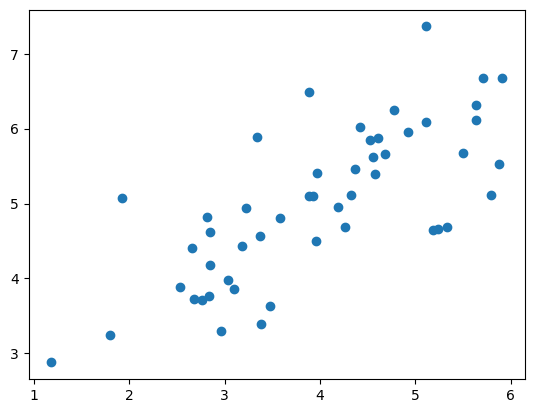

In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = loadmat('data.mat') 
X = data['X']

plt.scatter(X[:, 0], X[:, 1])

b) Normalize and center the data and then find eigenvalues and eigenvectors.


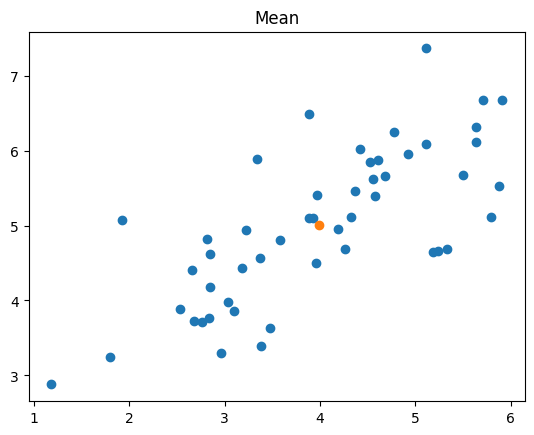

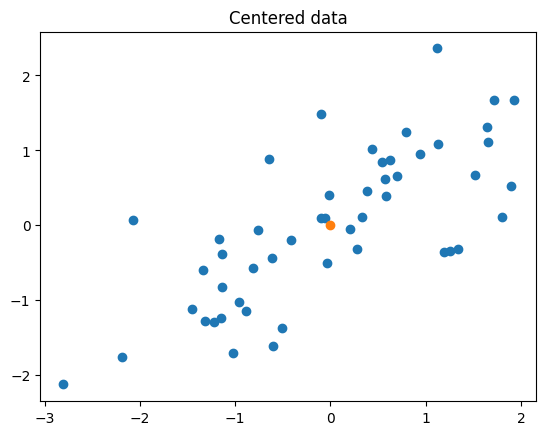

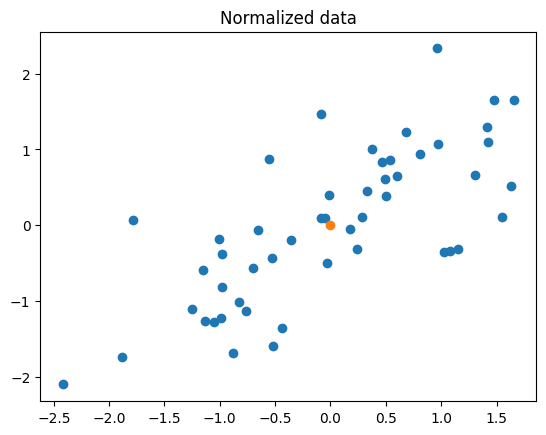

Covariance matrix: 
[[1.02040816 0.7505412 ]
 [0.7505412  1.02040816]]

Eigenvalues: 
[1.77094936 0.26986696]

Eigenvectors: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Dot product of the eigenvectors: 2.2371143170757382e-17


In [125]:
def plot_with_center(x, y, title):
    plt.scatter(x, y)
    plt.title(title)
    plt.scatter(x.mean(), y.mean())
    plt.show()

# Let's find the mean
mD1 = np.mean(X[:,0])
mD2 = np.mean(X[:,1])

plot_with_center(X[:,0], X[:,1], title="Mean")

# Let's center data
center_function = lambda x: x - x.mean()  # noqa: E731

# apply function to original NumPy array
cX1 = center_function(X[:,0])
cX2 = center_function(X[:,1])

plot_with_center(cX1, cX2, title="Centered data")

# Let's normalize data find
sc = StandardScaler()

data_std = pd.DataFrame(sc.fit_transform(X))

plot_with_center(data_std.iloc()[:, 0], data_std.iloc()[:, 1], title="Normalized data")

# Let's find eigenvectors and eigenvalues
cov_matrix = data_std.cov() #np.cov(data_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print(f"Covariance matrix: \n{np.array(cov_matrix)}\n")
print(f"Eigenvalues: \n{np.array(eigen_vals)}\n")
print(f"Eigenvectors: \n{np.array(eigen_vecs)}\n")
print(f"Dot product of the eigenvectors: {np.dot(eigen_vecs[:, 0], eigen_vecs[:, 1])}")


c) Project data to PCA1 and plot.

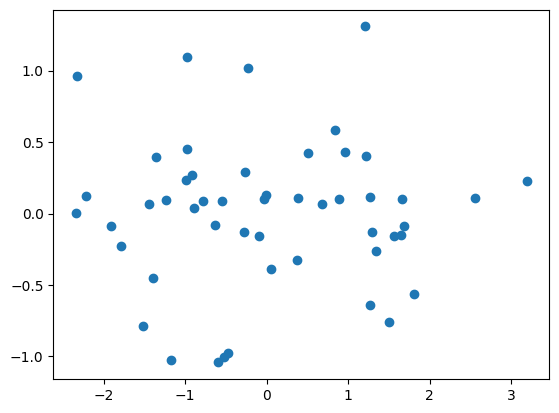

In [126]:
correction_matrix = np.array([[-1, 0], [0, 1]])

eigen_vecs_corrected = eigen_vecs @ correction_matrix
# eigen_vecs_corrected = np.matmul(eigen_vecs, correction_matrix)

pca = np.dot(data_std, eigen_vecs_corrected)
plt.scatter(pca[:, 0], pca[:, 1])
plt.show()


d) Compare the result with 'sklearn.decomposition.PCA'

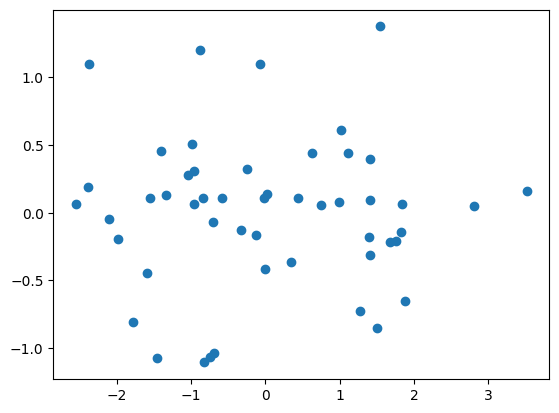

In [127]:
p = PCA(n_components=2)
sk_pca = p.fit_transform(X)
plt.scatter(sk_pca[:, 0], sk_pca[:, 1])
plt.show()
